<a href="https://colab.research.google.com/github/immanuelobani/Big-Data-Classification-of-Spam-with-Topic-Model-Features/blob/main/22027395_MAIN_EXPIREMTENTS_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 18.2 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039292 sha256=b7af73dac78d970e74fcc2629270e73869d22cf110eea3b435f7e7a8e6eea903
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
from imblearn.over_sampling import SMOTE
import spacy
import pandas as pd
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler
from gensim import corpora, models
#import openai
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from bertopic import BERTopic
import numpy as np
from nltk import pos_tag, word_tokenize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import gensim
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
import tensorflow as tf














In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


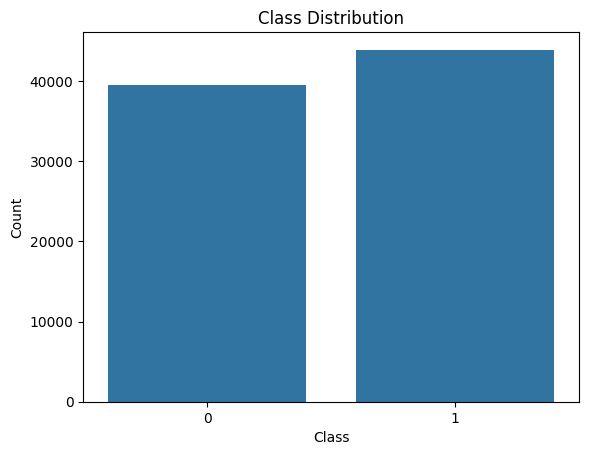

In [ ]:

# Assuming 'labels' is your list of class labels (0 for not spam, 1 for spam)
sns.countplot(x='label', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [ ]:
# Assuming 'labels' is your list of class labels
class_distribution = df['label'].value_counts()
class_ratio = class_distribution[1] / class_distribution[0]
print("Class Ratio (Spam to Not Spam):", class_ratio)


Class Ratio (Spam to Not Spam): 1.1105771662704234


**PREPROCESSING WITH LEMMITISATION**

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Tokenise
    tokens = nltk.word_tokenize(text)

    # Remove stop words and lemmatise
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]

    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**APPLYING THE PREPROCESSING TO THE DATAFRAME**

In [ ]:
df['tokens'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

LSA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens into strings
df['joined_tokens'] = df['tokens'].apply(' '.join)

# Split the data into training and testing sets using joined tokens
X_train, X_test, y_train, y_test = train_test_split(df['joined_tokens'], df['label'], test_size=0.2, random_state=42)

# Vectorisation
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)

# Perform LSA using TruncatedSVD
lsa = TruncatedSVD(n_components=2)
X_train_lsa = lsa.fit_transform(X_train_tfidf)

# The transformed matrix gives us the documents in the new feature space
print("Document representations in LSA space:")
print(X_train_lsa)


Document representations in LSA space:
[[ 0.03093187  0.01180296]
 [ 0.06000911 -0.00063542]
 [ 0.21799122 -0.01631471]
 ...
 [ 0.59927752 -0.05668861]
 [ 0.13033172  0.02703417]
 [ 0.47804308 -0.03426399]]


In [ ]:
import plotly.express as px

# Create a new list of string labels based on y_train
labels = ['non-spam' if label == 0 else 'spam' for label in y_train]

# Define your custom colors for each category
color_discrete_map = {'non-spam': 'blue', 'spam': 'green'}

# Generate the scatter plot using the labels list for coloring and custom color map
fig = px.scatter(x=X_train_lsa[:, 0], y=X_train_lsa[:, 1], color=labels,
                 color_discrete_map=color_discrete_map)

# Update the layout to set background color to white and update the legend title
fig.update_layout(
    title='Interactive Scatter Plot of LSA Components',
    xaxis_title='LSA Component 1',
    yaxis_title='LSA Component 2',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend_title_text='Category'  # Update legend title
)

# Show the figure
fig.show()


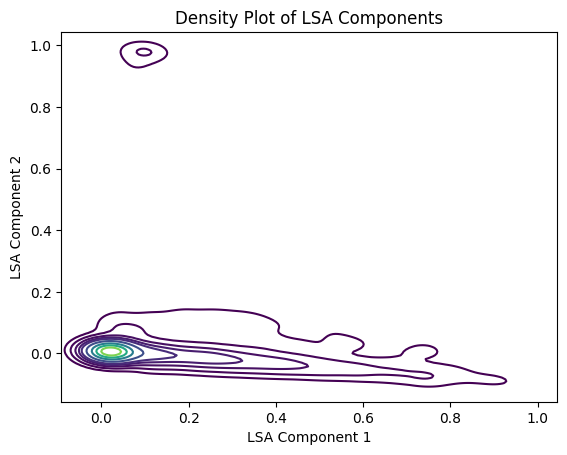

In [ ]:
sns.kdeplot(x=X_train_lsa[:, 0], y=X_train_lsa[:, 1], cmap='viridis')
plt.title('Density Plot of LSA Components')
plt.xlabel('LSA Component 1')
plt.ylabel('LSA Component 2')
plt.show()


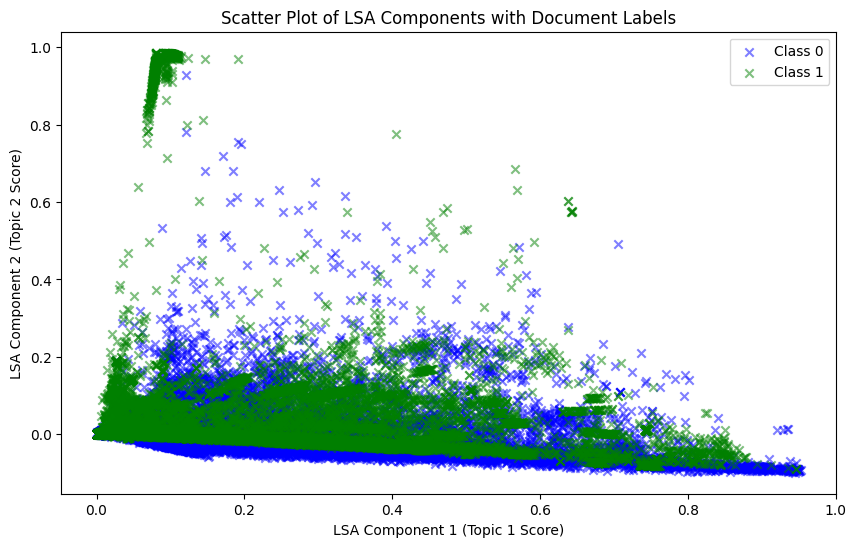

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a color map for the labels4
colors = np.array(['blue', 'green'])
unique_labels = np.unique(y_train)

# Scatter plot for LSA components with color coding for labels and custom markers
plt.figure(figsize=(10, 6))
for label in unique_labels:
    idx = y_train == label
    plt.scatter(X_train_lsa[idx, 0], X_train_lsa[idx, 1], c=colors[label], label=f'Class {label}', alpha=0.5, marker='x')

# Labeling the axes with more descriptive names
plt.xlabel('LSA Component 1 (Topic 1 Score)')
plt.ylabel('LSA Component 2 (Topic 2 Score)')
plt.title('Scatter Plot of LSA Components with Document Labels')
plt.legend()

plt.show()


In [ ]:
# Check the number of samples in X_test and y_test using the shape attribute
num_samples_x_test = X_test.shape[0]
num_samples_y_test = y_test.shape[0]

print(f"Number of samples in X_test: {num_samples_x_test}")
print(f"Number of samples in y_test: {num_samples_y_test}")

# Alternatively, you can use the len function
num_samples_x_test_len = len(X_test)
num_samples_y_test_len = len(y_test)

print(f"Number of samples in X_test (using len): {num_samples_x_test_len}")
print(f"Number of samples in y_test (using len): {num_samples_y_test_len}")


Number of samples in X_test: 16690
Number of samples in y_test: 16690
Number of samples in X_test (using len): 16690
Number of samples in y_test (using len): 16690


**BUILDING THE LDA MODEL**

In [ ]:
dictionary = corpora.Dictionary(df['tokens'])

# Convert the tokenised documents into a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# Build the LDA model
num_topics = 50
passes = 15
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)


In [ ]:
# Print the topics and their associated words
topics = lda_model.print_topics(num_topics=num_topics, num_words=20)

# Display topics
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


Topic 0: 0.096*"eescapenumber" + 0.023*"archive" + 0.021*"hescapenumber" + 0.021*"commondreams" + 0.021*"painting" + 0.018*"xml" + 0.017*"byte" + 0.016*"utf" + 0.016*"cabot" + 0.014*"di" + 0.012*"www" + 0.011*"prop" + 0.011*"cb" + 0.010*"bc" + 0.009*"e" + 0.009*"id" + 0.009*"uescapenumber" + 0.008*"mysql" + 0.008*"digest" + 0.007*"cm"
Topic 1: 0.048*"date" + 0.043*"schedule" + 0.034*"et" + 0.031*"final" + 0.027*"hour" + 0.021*"txt" + 0.020*"california" + 0.020*"iso" + 0.020*"start" + 0.019*"log" + 0.017*"term" + 0.016*"total" + 0.016*"hourahead" + 0.016*"scheduling" + 0.016*"month" + 0.015*"portland" + 0.015*"file" + 0.015*"message" + 0.013*"variance" + 0.012*"detected"
Topic 2: 0.025*"child" + 0.019*"report" + 0.015*"many" + 0.015*"say" + 0.012*"play" + 0.012*"world" + 0.010*"l" + 0.009*"new" + 0.009*"shop" + 0.009*"men" + 0.008*"parent" + 0.008*"treasury" + 0.008*"alaska" + 0.008*"day" + 0.008*"site" + 0.008*"kid" + 0.008*"old" + 0.008*"preparation" + 0.007*"free" + 0.007*"customer"


In [ ]:
pip install gensim

Metrics for Naive Bayes with LDA features:
Accuracy: 0.5318304373876572
Precision: 0.7510295936972786
Recall: 0.5318304373876572
F1 Score: 0.36937027877423045

Metrics for SVM with LDA features:
Accuracy: 0.5265128819652487
Precision: 0.5017731737523303
Recall: 0.5265128819652487
F1 Score: 0.4229966730279411


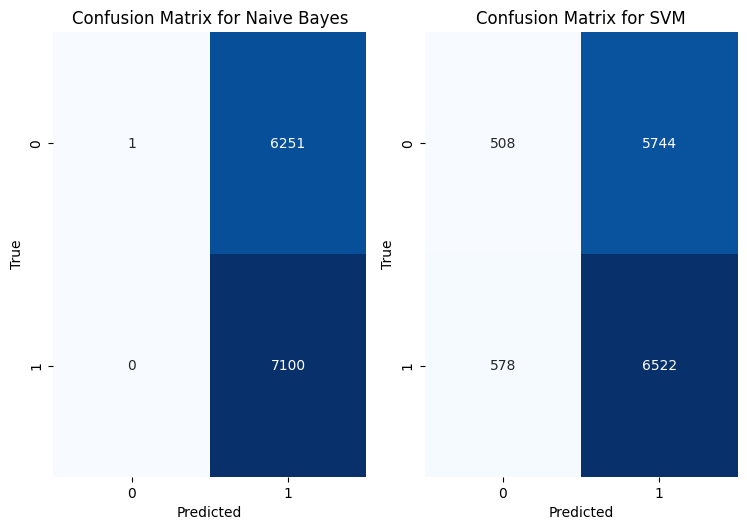

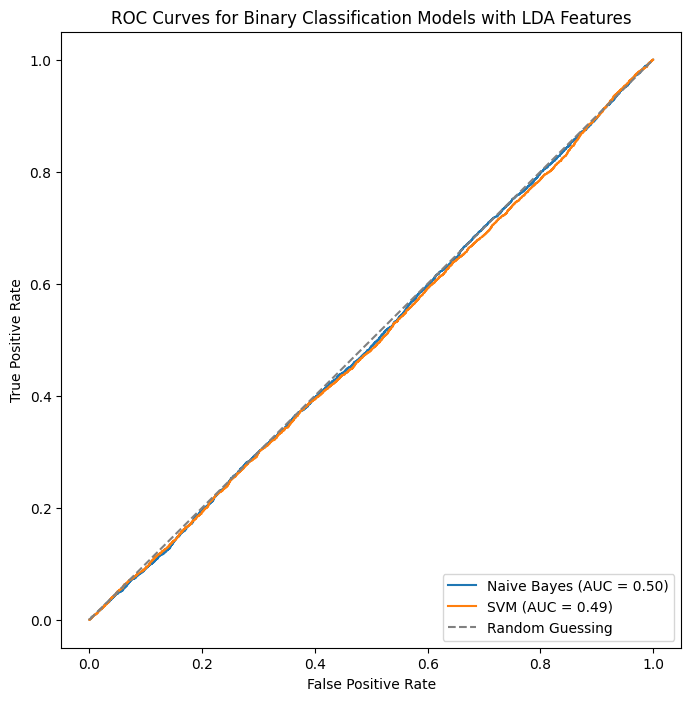

In [ ]:
# Function to calculate coherence for a given number of topics
def calculate_coherence(corpus, dictionary, texts, num_topics):
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Get LDA features for the entire corpus
lda_features = lda_model[corpus]

# Convert the LDA features into a dense matrix
X_lda_dense = gensim.matutils.corpus2dense(lda_features, num_terms=num_topics).T

# Ensure X_lda_dense and y_train have the same number of samples
X_lda_dense = X_lda_dense[:len(y_train)]

# Split the LDA features into training and testing sets
X_train_lda_dense, X_test_lda_dense, y_train, y_test = train_test_split(X_lda_dense, y_train, test_size=0.2, random_state=42)

# Train Naive Bayes classifier on LDA features
nb_classifier_lda = MultinomialNB()
nb_classifier_lda.fit(X_train_lda_dense, y_train)



# Predictions on the test set using Naive Bayes with LDA features
y_pred_lda = nb_classifier_lda.predict(X_test_lda_dense)

# Evaluate Naive Bayes with LDA features
print("Metrics for Naive Bayes with LDA features:")
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Precision:", precision_score(y_test, y_pred_lda, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lda, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_lda, average='weighted'))

# Train SVM classifier on LDA features
svm_classifier_lda = SVC()
svm_classifier_lda.fit(X_train_lda_dense, y_train)

# Predictions on the test set using SVM with LDA features
y_pred_svm_lda = svm_classifier_lda.predict(X_test_lda_dense)

# Evaluate SVM with LDA features
print("\nMetrics for SVM with LDA features:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_lda))
print("Precision:", precision_score(y_test, y_pred_svm_lda, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm_lda, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm_lda, average='weighted'))

# List of classifiers and their corresponding models
classifiers = [
    ('Naive Bayes', nb_classifier_lda),
    ('SVM', svm_classifier_lda)
]

# Create a subplot for confusion matrices
plt.figure(figsize=(15, 10))

for i, (classifier_name, classifier_model) in enumerate(classifiers, 1):
    plt.subplot(2, 4, i)

    # Predictions on the test set
    y_pred = classifier_model.predict(X_test_lda_dense)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {classifier_name}')

plt.tight_layout()
plt.show()


# List of classifiers and their corresponding models
classifiers = [
    ('Naive Bayes', nb_classifier_lda),
    ('SVM', svm_classifier_lda)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 8))

for classifier_name, classifier_model in classifiers:
    # For each classifier, get the decision function or predicted probabilities
    if hasattr(classifier_model, "decision_function"):
        y_score = classifier_model.decision_function(X_test_lda_dense)
    else:
        y_score = classifier_model.predict_proba(X_test_lda_dense)[:, 1]

    # Binarize the labels
    y_test_bin = label_binarize(y_test, classes=classifier_model.classes_)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Binary Classification Models with LDA Features')
plt.legend(loc='lower right')

# Show the plot
plt.show()

Epoch 1/10
1336/1336 [==============================] - 8s 4ms/step - loss: 0.6922 - accuracy: 0.5238 - val_loss: 0.6922 - val_accuracy: 0.5228
Epoch 2/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6918 - accuracy: 0.5250 - val_loss: 0.6920 - val_accuracy: 0.5226
Epoch 3/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6916 - accuracy: 0.5259 - val_loss: 0.6921 - val_accuracy: 0.5229
Epoch 4/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6913 - accuracy: 0.5269 - val_loss: 0.6924 - val_accuracy: 0.5224
Epoch 5/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6911 - accuracy: 0.5255 - val_loss: 0.6929 - val_accuracy: 0.5198
Epoch 6/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6909 - accuracy: 0.5283 - val_loss: 0.6930 - val_accuracy: 0.5206
Epoch 7/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.6906 - accuracy: 0.5295 - val_loss: 0.6926 - val_accuracy:

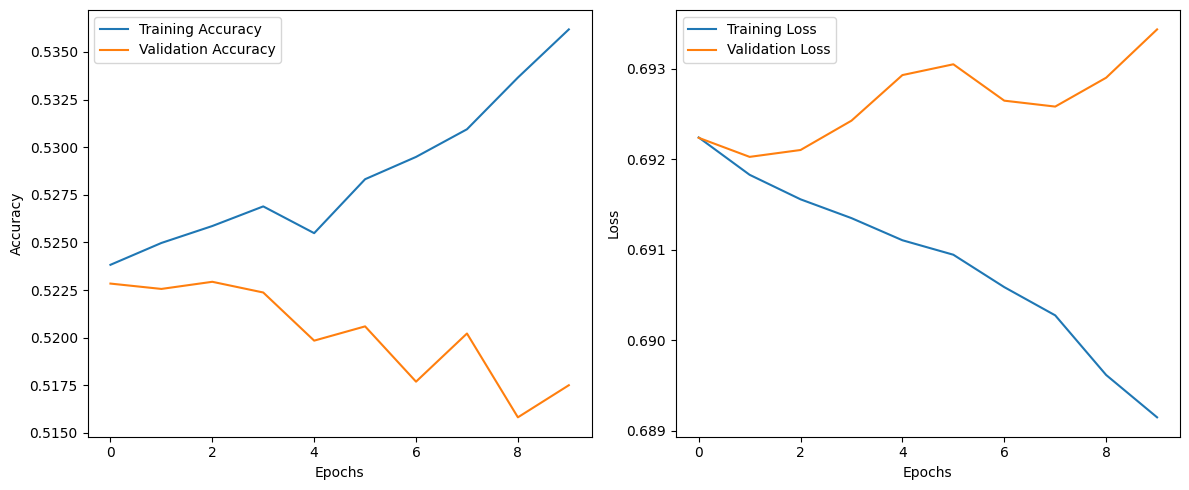

In [ ]:
#Neural Network

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_lda_dense.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train_lda_dense, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Predictions on the test set
y_pred_nn = model.predict(X_test_lda_dense)  # Use the test set for predictions
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the neural network
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')

print("\nMetrics for Neural Network with LDA features:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**ROC CURVE WITH LDA FEATURES**

418/418 [==============================] - 1s 1ms/step


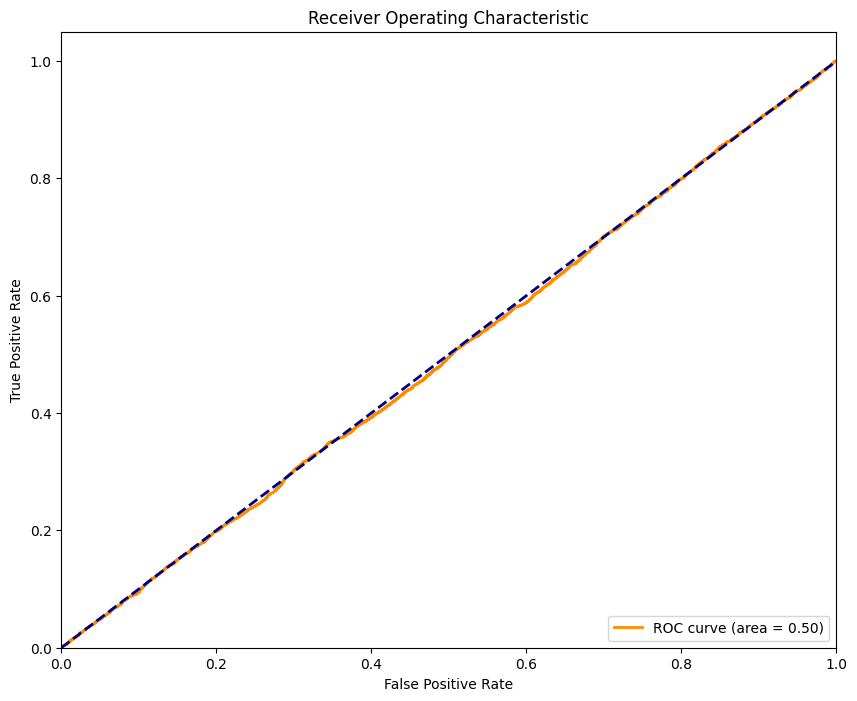

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test_lda_dense).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Metrics for Naive Bayes with BERTopic features:
Accuracy: 0.5243858597962852
Precision: 0.27498052995428923
Recall: 0.5243858597962852
F1 Score: 0.3607754928808339

Metrics for SVM with BERTopic features:
Accuracy: 0.6421210305572199
Precision: 0.6511043195296611
Recall: 0.6421210305572199
F1 Score: 0.6307071246769352
Epoch 1/10
1669/1669 [==============================] - 7s 4ms/step - loss: 0.5902 - accuracy: 0.6939 - val_loss: 0.5691 - val_accuracy: 0.6643
Epoch 2/10
1669/1669 [==============================] - 6s 3ms/step - loss: 0.5425 - accuracy: 0.7130 - val_loss: 0.5355 - val_accuracy: 0.7277
Epoch 3/10
1669/1669 [==============================] - 6s 3ms/step - loss: 0.5245 - accuracy: 0.7342 - val_loss: 0.5240 - val_accuracy: 0.7277
Epoch 4/10
1669/1669 [==============================] - 6s 3ms/step - loss: 0.5193 - accuracy: 0.7348 - val_loss: 0.5247 - val_accuracy: 0.7264
Epoch 5/10
1669/1669 [==============================] - 6s 3ms/step - loss: 0.5176 - accuracy: 0.7350 - 

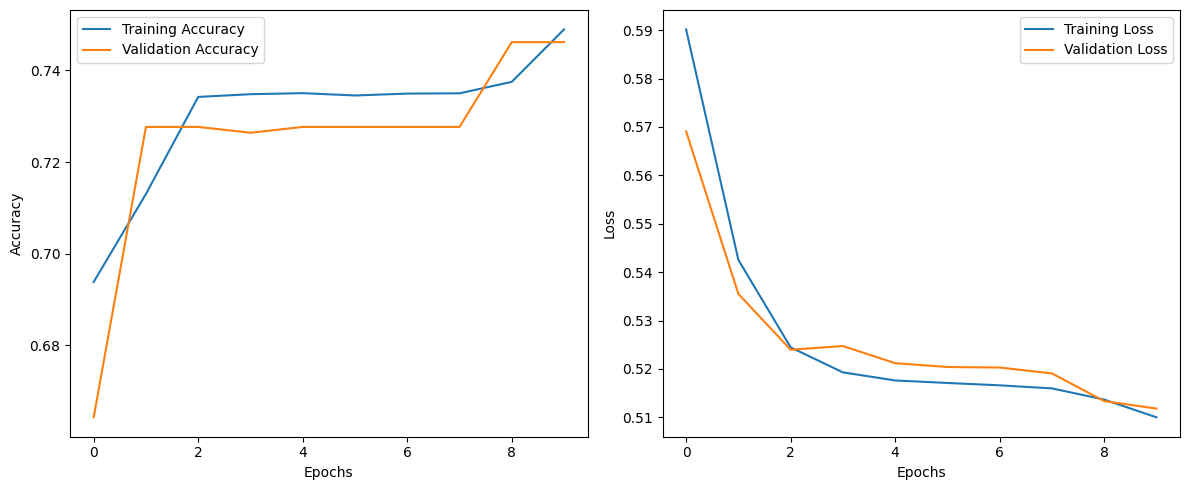

In [ ]:
# Apply the preprocessing to the text data
df['processed_text'] = df['text'].apply(lambda x: ' '.join(preprocess_text(x)))


# BERTopic for topic modeling with a specified number of topics
num_topics_bertopic = 50
topic_model = BERTopic(nr_topics=num_topics_bertopic)


# Fit BERTopic on the text data
#topics, _ = topic_model.fit_transform(df['text'])

# Fit BERTopic on the preprocessed text data
topics, _ = topic_model.fit_transform(df['processed_text'])



# Convert BERTopic features to a NumPy array
X_bertopic = np.array(topics)

# Add a constant to make the values non-negative
X_bertopic_non_negative = X_bertopic - X_bertopic.min() + 1

# Reshape the array to 2D
X_bertopic_2d = X_bertopic_non_negative.reshape(-1, 1)

# Split the BERTopic features into training and testing sets
X_train_bertopic, X_test_bertopic, y_train, y_test = train_test_split(X_bertopic_2d, df['label'], test_size=0.2, random_state=42)

# Scale BERTopic features
scaler = StandardScaler()
X_train_bertopic_scaled = scaler.fit_transform(X_train_bertopic)
X_test_bertopic_scaled = scaler.transform(X_test_bertopic)

# Train Multinomial Naive Bayes classifier on BERTopic features
nb_classifier_bertopic = MultinomialNB()
nb_classifier_bertopic.fit(X_train_bertopic, y_train)



# Predictions on the test set using Naive Bayes with BERTopic features
y_pred_bertopic = nb_classifier_bertopic.predict(X_test_bertopic)

# Evaluate Naive Bayes with BERTopic features
print("Metrics for Naive Bayes with BERTopic features:")
print("Accuracy:", accuracy_score(y_test, y_pred_bertopic))
print("Precision:", precision_score(y_test, y_pred_bertopic, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_bertopic, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_bertopic, average='weighted'))

# Train SVM classifier on BERTopic features
svm_classifier_bertopic = SVC(probability=True)
svm_classifier_bertopic.fit(X_train_bertopic, y_train)

# Predictions on the test set using SVM with BERTopic features
y_pred_bertopic_svm = svm_classifier_bertopic.predict(X_test_bertopic)

# Evaluate SVM with BERTopic features
print("\nMetrics for SVM with BERTopic features:")
print("Accuracy:", accuracy_score(y_test, y_pred_bertopic_svm))
print("Precision:", precision_score(y_test, y_pred_bertopic_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_bertopic_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_bertopic_svm, average='weighted'))

#Neural Network
# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bertopic_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train_bertopic_scaled, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Predictions on the test set
y_pred_nn = model.predict(X_test_bertopic_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary output

# Evaluate the neural network
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn, average='weighted')
nn_recall = recall_score(y_test, y_pred_nn, average='weighted')
nn_f1 = f1_score(y_test, y_pred_nn, average='weighted')

print("\nMetrics for Neural Network with BERTopic features:")
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1 Score:", nn_f1)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**CONFUSION MATRIX**

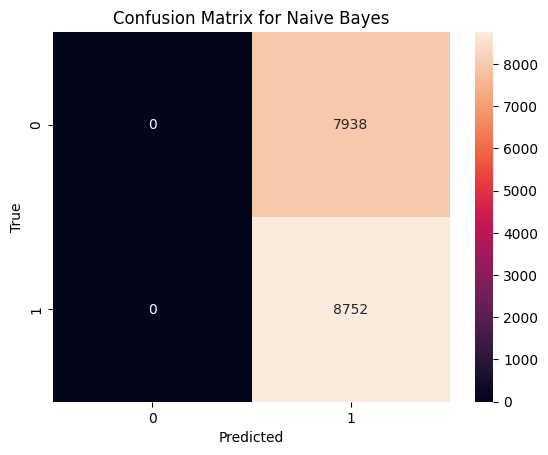

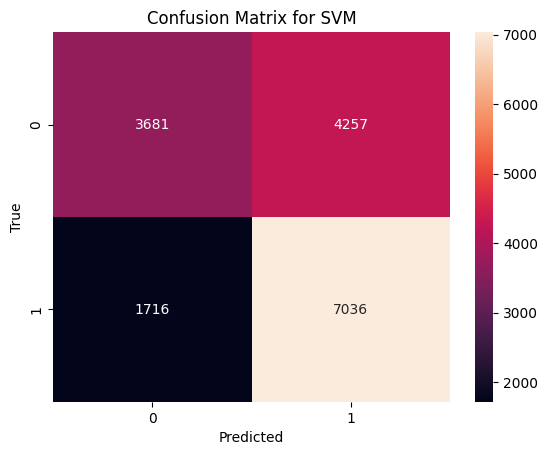

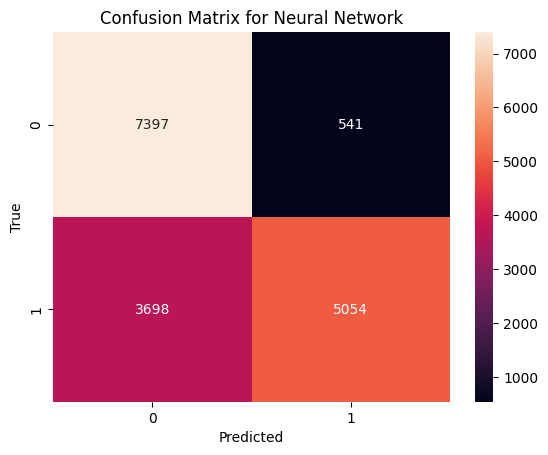

In [ ]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_bertopic)
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_bertopic_svm)
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**ROC CURVE**

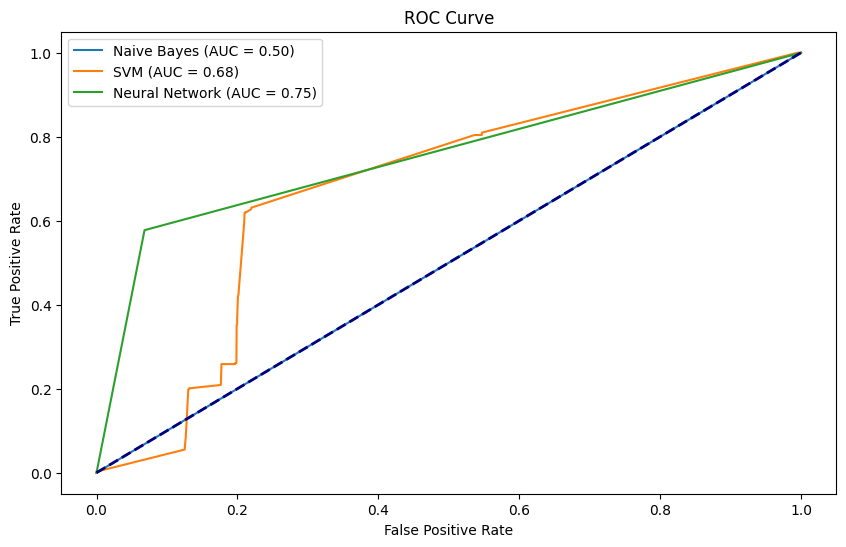

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curve for each model
plt.figure(figsize=(10, 6))

# Naive Bayes
y_pred_prob_nb = nb_classifier_bertopic.predict_proba(X_test_bertopic)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
auc_nb = roc_auc_score(y_test, y_pred_prob_nb)
plot_roc_curve(fpr_nb, tpr_nb, auc_nb, 'Naive Bayes')

# SVM (need to enable probability estimation during SVM training)
svm_classifier_bertopic = SVC(probability=True)
svm_classifier_bertopic.fit(X_train_bertopic, y_train)
y_pred_prob_svm = svm_classifier_bertopic.predict_proba(X_test_bertopic)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
plot_roc_curve(fpr_svm, tpr_svm, auc_svm, 'SVM')

# Neural Network
# Use y_pred_nn as it already contains the probability predictions
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_nn)
plot_roc_curve(fpr_nn, tpr_nn, auc_nn, 'Neural Network')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Add diagonal line
plt.show()


**LDA AND BERTOPIC FEATURES COMBINED**

BERTopic feature shape: (83448, 1)
LDA feature shape: (66758, 50)
Metrics for Naive Bayes with combined BERTopic and LDA features:
Accuracy: 0.92690233672858
Precision: 0.9282333297978723
Recall: 0.92690233672858
F1 Score: 0.9269668207357462
Metrics for SVM with combined BERTopic and LDA features:
Accuracy: 0.9728879568603954
Precision: 0.9729076625882886
Recall: 0.9728879568603954
F1 Score: 0.9728806194639974


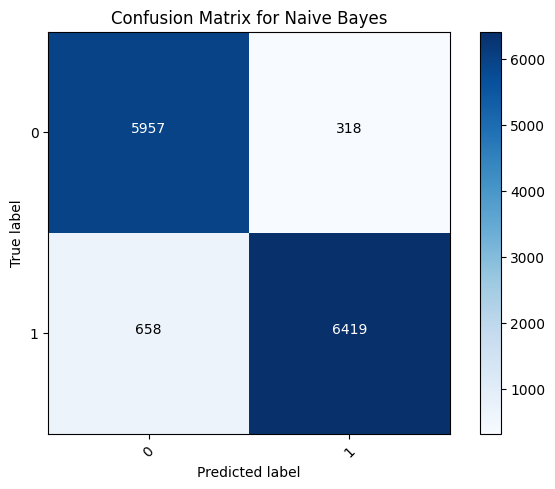

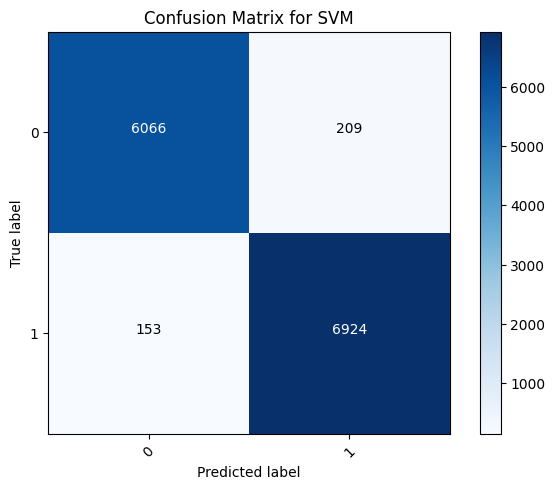

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Check the shapes of both feature arrays
print("BERTopic feature shape:", X_bertopic_2d.shape)
print("LDA feature shape:", X_lda_dense.shape)

# Align the sizes of both arrays
min_size = min(X_bertopic_2d.shape[0], X_lda_dense.shape[0])
X_bertopic_aligned = X_bertopic_2d[:min_size, :]
X_lda_aligned = X_lda_dense[:min_size, :]

# Concatenate the aligned features
X_combined = np.hstack((X_bertopic_aligned, X_lda_aligned))

# Scale the combined features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Split the combined features into training and testing sets
X_train_combined, X_test_combined, y_train, y_test = train_test_split(X_combined_scaled, df['label'][:min_size], test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes classifier on combined features
nb_classifier_combined = GaussianNB()
nb_classifier_combined.fit(X_train_combined, y_train)

# Predictions on the test set using Naive Bayes with combined features
y_pred_combined = nb_classifier_combined.predict(X_test_combined)

# Evaluate Naive Bayes with combined features
print("Metrics for Naive Bayes with combined BERTopic and LDA features:")
print("Accuracy:", accuracy_score(y_test, y_pred_combined))
print("Precision:", precision_score(y_test, y_pred_combined, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_combined, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_combined, average='weighted'))

# Train SVM classifier on combined features
svm_classifier_combined = SVC(probability=True)  # Instantiate SVM with probability=True for ROC curve later
svm_classifier_combined.fit(X_train_combined, y_train)

# Predictions on the test set using SVM with combined features
y_pred_svm_combined = svm_classifier_combined.predict(X_test_combined)

# Evaluate SVM with combined features
print("Metrics for SVM with combined BERTopic and LDA features:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_combined))
print("Precision:", precision_score(y_test, y_pred_svm_combined, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm_combined, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm_combined, average='weighted'))

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    """
    Function to plot the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test), rotation=45)
    plt.yticks(tick_marks, np.unique(y_test))

    # Text annotations inside the squares
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot the confusion matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_combined)
plot_confusion_matrix(conf_matrix_nb, title='Confusion Matrix for Naive Bayes')

# Compute and plot the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm_combined)
plot_confusion_matrix(conf_matrix_svm, title='Confusion Matrix for SVM')

Epoch 1/10
1336/1336 [==============================] - 5s 3ms/step - loss: 0.1499 - accuracy: 0.9460 - val_loss: 0.1039 - val_accuracy: 0.9665
Epoch 2/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0975 - accuracy: 0.9663 - val_loss: 0.0955 - val_accuracy: 0.9692
Epoch 3/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0874 - accuracy: 0.9697 - val_loss: 0.0949 - val_accuracy: 0.9682
Epoch 4/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0795 - accuracy: 0.9723 - val_loss: 0.0918 - val_accuracy: 0.9706
Epoch 5/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0743 - accuracy: 0.9747 - val_loss: 0.0891 - val_accuracy: 0.9721
Epoch 6/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0702 - accuracy: 0.9760 - val_loss: 0.0908 - val_accuracy: 0.9713
Epoch 7/10
1336/1336 [==============================] - 4s 3ms/step - loss: 0.0665 - accuracy: 0.9770 - val_loss: 0.0896 - val_accuracy:

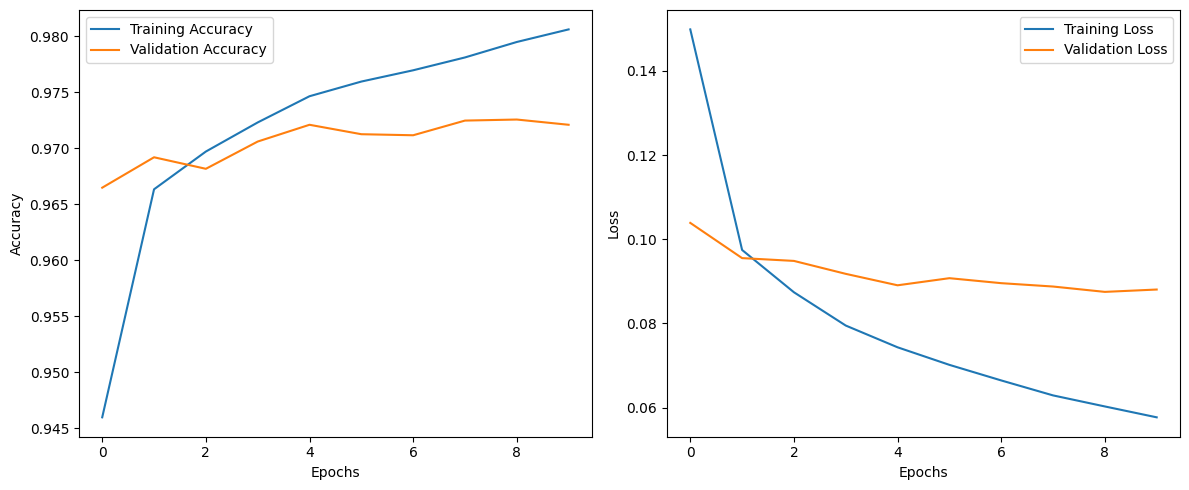

In [ ]:

# Ensure the input shape matches the number of features in the combined dataset
input_shape = X_train_combined.shape[1]  # Adjusted to use combined features

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model to the combined training data
history = model.fit(X_train_combined, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Predictions on the test set using the combined test features
y_pred_proba = model.predict(X_test_combined)
y_pred = np.round(y_pred_proba)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Evaluate the model on the combined test set
test_loss, test_accuracy = model.evaluate(X_test_combined, y_test)
print("Test accuracy:", test_accuracy)

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


418/418 [==============================] - 1s 1ms/step


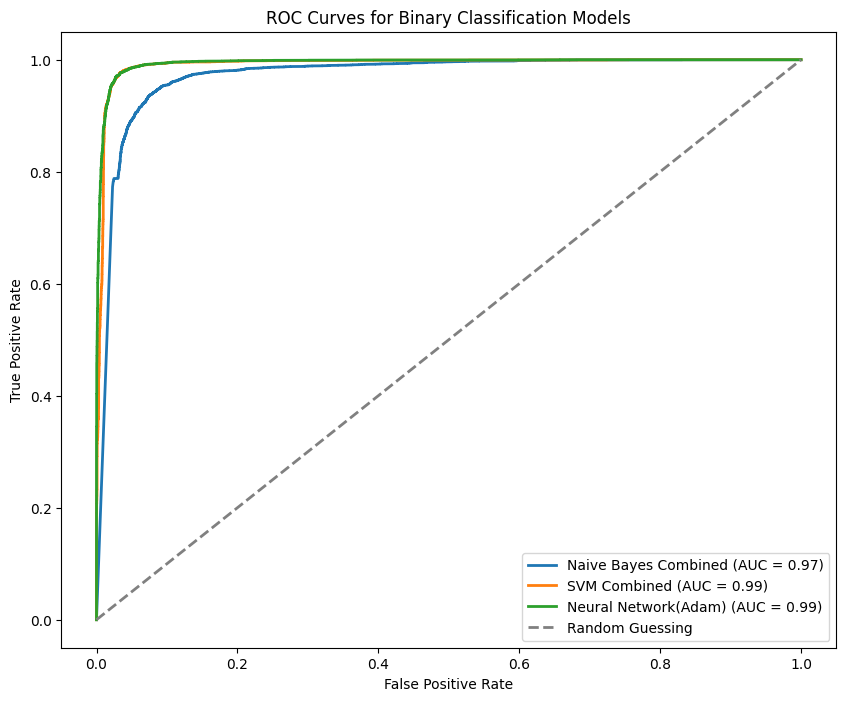

In [ ]:

# Modify y_test to match the size of X_test_combined
y_test_aligned = y_test[:len(X_test_combined)]

# Assuming y_test is binarized outside the loop if it has more than two classes
y_test_bin = label_binarize(y_test_aligned, classes=np.unique(y_test_aligned))

# List of classifiers and their corresponding models
classifiers = [
    ('Naive Bayes Combined', nb_classifier_combined),
    ('SVM Combined', svm_classifier_combined),
    ('Neural Network(Adam)', model)
]

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

for classifier_name, classifier_model in classifiers:
    if classifier_name in ['Naive Bayes Combined', 'SVM Combined']:
        # For Naive Bayes and SVM classifiers, use predict_proba method
        y_score = classifier_model.predict_proba(X_test_combined)[:, 1]
    else:
        # For the neural network model, use the .predict() method
        y_score = classifier_model.predict(X_test_combined).ravel()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Random Guessing')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Binary Classification Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()



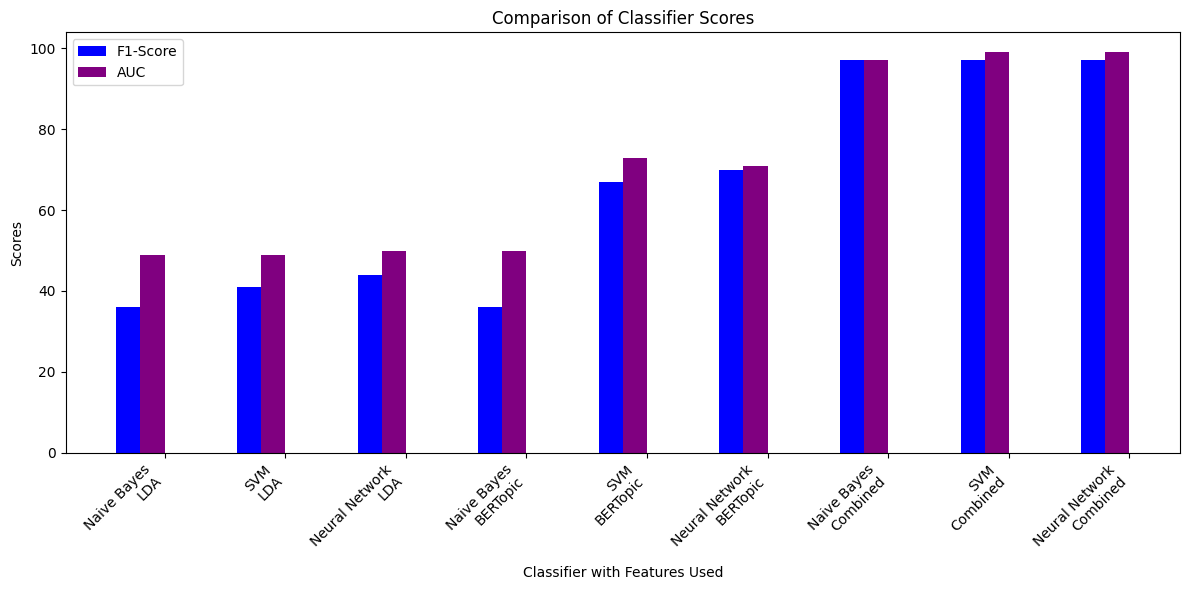

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data manually added from the result summary table in the report
data = {
    'Classifier': [
        'Naive Bayes', 'SVM', 'Neural Network',
        'Naive Bayes', 'SVM', 'Neural Network',
        'Naive Bayes', 'SVM', 'Neural Network'
    ],
    'Features Used': [
        'LDA', 'LDA', 'LDA',
        'BERTopic', 'BERTopic', 'BERTopic',
        'Combined', 'Combined', 'Combined'
    ],
    'F1-Score': [36, 41, 44, 36, 67, 70, 97, 97, 97],
    #'Precision': [27, 49, 49, 27, 72, 72, 92, 97, 96],
    'AUC': [49, 49, 50, 50, 73, 71, 97, 99, 99]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# List of metrics to plot
metrics = ['F1-Score', 'AUC']
colors = ['blue', 'purple']

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    ax.bar(df.index + i*0.2, df[metric], width=0.2, label=metric, color=colors[i])

# Set the position and labels for x-ticks
ax.set_xticks(df.index + 0.3)  # center the label under the group of bars
ax.set_xticklabels([f'{clf}\n{feat}' for clf, feat in zip(df['Classifier'], df['Features Used'])],
                   rotation=45, ha='right')

# Adding labels and title
ax.set_xlabel('Classifier with Features Used')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classifier Scores')

# Adding legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
